# Лабораторная работа №0
## Анализ датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

Посмотрим первые пять строк датасета

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Размер

In [ ]:
df.shape

(5110, 12)

Признаки и их типы

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Можно заметить, что hypertension, heart disease и stroke представлены как int, но мы знаем, что это категориальные переменные. Поэтому давай конверитуем их в объектный тип

In [ ]:
columns_to_convert = ['hypertension', 'heart_disease', 'stroke']
df[columns_to_convert] = df[columns_to_convert].astype(str)

### Описание признаков

1) id: unique identifier 

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Cводные статистические данные

In [ ]:
df.describe().style.background_gradient(cmap = "plasma")

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Удалим ID, т.к. он не понадобится при аналитике

In [ ]:
df.drop('id', axis= 1, inplace= True)

In [ ]:
cat_features = df.select_dtypes(exclude="number").columns
num_cols = df.select_dtypes(include="number").columns
print('Категориальные признаки: ', cat_features)
print('Количественные признаки: ', num_cols)

Категориальные признаки:  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')
Количественные признаки:  Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


Посмотрим пропущенные значения

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Пропущенные значения найдены в BMI

### Анализ целевого знаяения - stroke

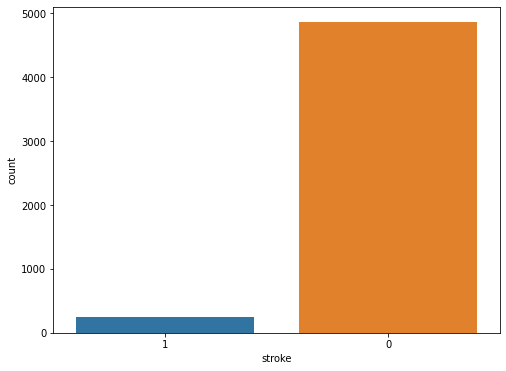

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'stroke', data = df)
plt.show()

Из графика видно, что мы имеем дисбаланс классов.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

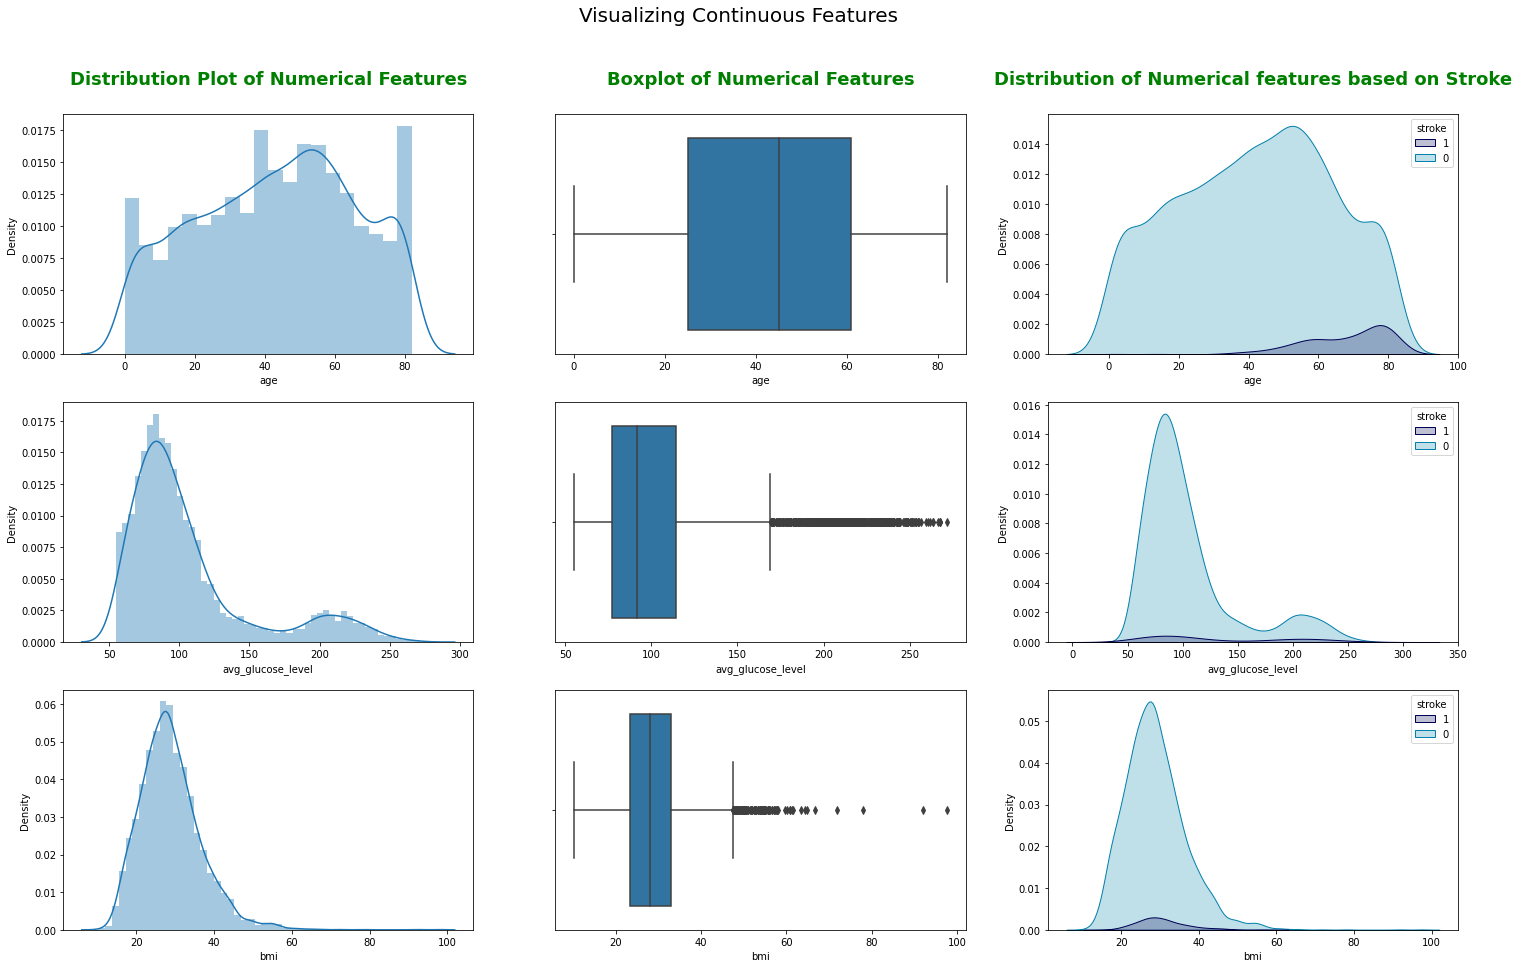

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(25,15))
for i,col in enumerate(num_cols):
    plt.suptitle("Visualizing Continuous Features",size=20)
    sns.distplot(df[col], ax=ax[i,0], kde=True)
    sns.boxplot(data=df, x=col, ax=ax[i,1])
    sns.kdeplot(data = df, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')
    if i == 0:
        ax[0,0].set_title('Distribution Plot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    elif i==1:
        ax[0,1].set_title('Boxplot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    else:
        ax[0,2].set_title('Distribution of Numerical features based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='green')

У нас имеются выбросы в avg_glucose_level и bmi.

Так же можно заменить, что пожилые люди имеют больше шансов получить инсульт

Посмотрим данные в категориальных признаках

In [ ]:
cat_cols = cat_features[:-1]
for col in cat_cols:
    print(f'============{col}============\n {df[col].value_counts()}\n')

============gender============
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

============hypertension============
 0    4612
1     498
Name: hypertension, dtype: int64

============heart_disease============
 0    4834
1     276
Name: heart_disease, dtype: int64

============ever_married============
 Yes    3353
No     1757
Name: ever_married, dtype: int64

============work_type============
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

============Residence_type============
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

============smoking_status============
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





Only one instance of other category in Gender column. Let's drop it.

В категории "gender" имеется объект с классом "other", его можно убрать.

In [ ]:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace= True)

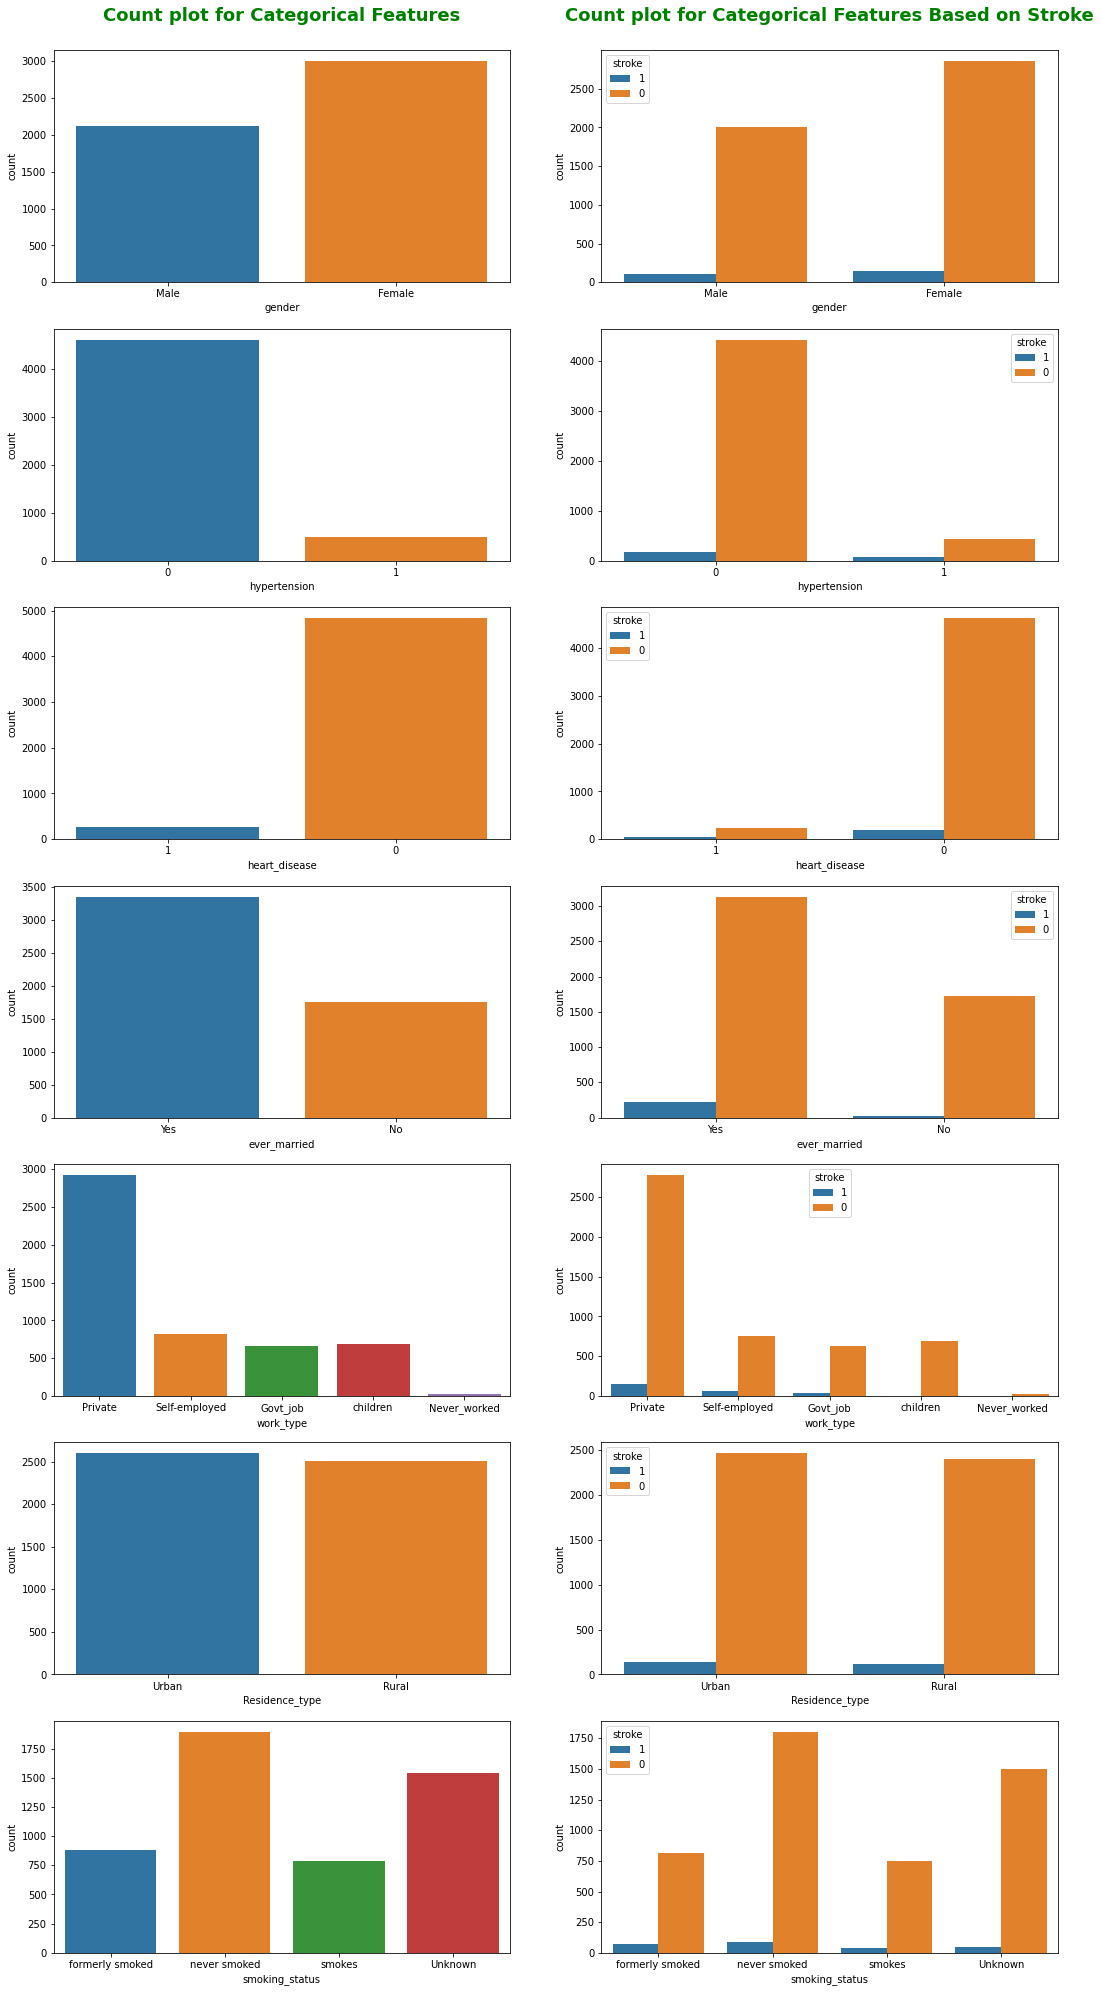

In [ ]:
fig,ax = plt.subplots(7,2,figsize=(18,35))
for i, col in enumerate(cat_cols):
    sns.countplot(data = df, x = col, ax=ax[i,0])
    sns.countplot(data = df, x = col,hue='stroke', ax=ax[i,1])
    if i == 0:
        ax[0,0].set_title('Count plot for Categorical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    else:
        ax[0,1].set_title('Count plot for Categorical Features Based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='green')

У людей, живущих в городах, чаще происходит инсульт, чем у тех, кто живёт вне города.


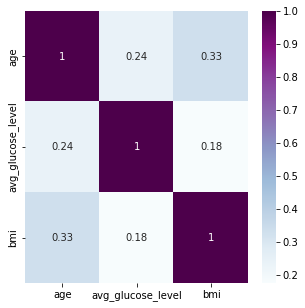

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")